In [71]:
import matplotlib.pyplot as plt

from quick_downloader import QuickDownloader
from chrome_utils import GrafanaUrlInputs
import pandas as pd
import numpy as np

In [2]:
# from_ts = "2025-08-22 12:50:00"  # Example timestamp
# to_ts = "2025-08-22 14:20:00"  # Example timestamp
# var_scenario = "ARInvoiceTracker"
# resource_groups = "rgQAToolsSaaSAKSResources-EastUS"
# names_space = "perflamd1"
# l1 = GrafanaUrlInputs(from_ts, to_ts, names_space, "l1", var_scenario, resource_groups)
#
# from_ts = "2025-08-21 18:00:00"  # Example timestamp
# to_ts = "2025-08-21 19:30:00"  # Example timestamp
# var_scenario = "ARInvoiceTracker"
# resource_groups = "rgQAToolsSaaSAKSResources-EastUS"
# names_space = "perfwamd2"
# w2 = GrafanaUrlInputs(from_ts, to_ts, names_space, "l2", var_scenario, resource_groups)
#
#
# downloader = QuickDownloader([l1, w2])
# data = downloader.download()

Getting table data for: Iterations per Scenario
Skipping Iterations per Scenario as it already exists in ./quick/perflamd1_2025-08-22_12-50-00-Iterations per Scenario_table.csv
Getting table data for: Request Duration per Scenario p99
Skipping Request Duration per Scenario p99 as it already exists in ./quick/perflamd1_2025-08-22_12-50-00-Request Duration per Scenario p99_table.csv
Getting table data for: Avg Iteration Duration p99
Skipping Avg Iteration Duration p99 as it already exists in ./quick/perflamd1_2025-08-22_12-50-00-Avg Iteration Duration p99_table.csv
Getting table data for: TTFB per Scenario
Skipping TTFB per Scenario as it already exists in ./quick/perflamd1_2025-08-22_12-50-00-TTFB per Scenario_table.csv
Getting table data for: Total Requests per Scenario
Skipping Total Requests per Scenario as it already exists in ./quick/perflamd1_2025-08-22_12-50-00-Total Requests per Scenario_table.csv
Finishing tables for perflamd1
Getting table data for: Iterations per Scenario
Ski

In [57]:
def load_normalized_csv(file_path):
    df = pd.read_csv(file_path, sep=',', parse_dates=['Time'])
    df.Time -= df.Time.min()
    df["dT"] = df["Time"].diff().dt.total_seconds()
    df.set_index('Time', inplace=True)
    df.sort_index(inplace=True)
    df["total"] = df.drop(columns=["dT"]).sum(axis=1)
    return df

def cut_by_window(df, start_time_str, duration):
    import re
    def parse_time_str(s):
        h = m = 0
        match = re.match(r'(?:(\d+)h)?\s*(?:(\d+)m)?', s)
        if match:
            h = int(match.group(1) or 0)
            m = int(match.group(2) or 0)
        return pd.Timedelta(hours=h, minutes=m)
    # start_time = df.index.min() + parse_time_str(start_time_str)
    # end_time = df.index.min() + parse_time_str(end_time_str)
    start_time = parse_time_str(start_time_str)
    end_time = start_time + parse_time_str(duration)
    return df[(df.index >= start_time) & (df.index <= end_time)]

In [58]:
perflamd1_tq_ps = load_normalized_csv("quick/perflamd1_2025-08-22_12-50-00-Total Requests per Scenario.csv")
perflamd1_tq_ps

,ARInvoiceTracker,BAQ,CopySalesOrder,CustomerTracker,GLJournalTracker,JobTracker,MiscARInvoice,POEntry10,POEntry20,PartMaintenance,...,QuantityOnHandCheck,QuoteEntry,SOEntry10ShipTos,SalesOrderEntry,SalesOrderErrorNO,SalesOrderErrorYES,SalesOrderTracker,SystemMonitor,dT,total
Time,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,3.0,4.0,2.0,2.0,4,3.0,3,3,3,3.0,...,4.0,3,3,3,3.0,3.0,3.0,3,NaN,58.0
0 days 00:00:15,8.0,6.0,4.0,9.0,10,9.0,9,8,8,9.0,...,10.0,8,9,7,8.0,9.0,8.0,3,15.0,151.0
0 days 00:00:30,22.0,19.0,13.0,23.0,21,18.0,20,22,22,22.0,...,19.0,19,22,19,17.0,18.0,22.0,7,15.0,367.0
0 days 00:00:45,35.0,36.0,24.0,40.0,41,36.0,36,38,38,38.0,...,37.0,35,39,35,30.0,36.0,37.0,10,15.0,655.0
0 days 00:01:00,58.0,49.0,40.0,59.0,60,52.0,56,59,59,58.0,...,54.0,55,57,55,46.0,52.0,55.0,12,15.0,992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 01:09:00,8536.0,12989.0,3157.0,1533.0,7134,20044.0,502,2354,206,6720.0,...,7700.0,583,459,1573,16848.0,19849.0,4549.0,163,15.0,120178.0
0 days 01:09:15,8526.0,12982.0,1054.0,1519.0,7123,20041.0,463,2312,158,2245.0,...,7690.0,559,419,1552,16844.0,19845.0,1526.0,156,15.0,110277.0
0 days 01:09:30,2843.0,4325.0,1050.0,1512.0,2378,20039.0,427,2269,109,2236.0,...,2564.0,532,388,522,5613.0,19843.0,1514.0,151,15.0,70074.0


<Axes: title={'center': 'perflamd1 Total Requests per Scenario'}, xlabel='Time'>

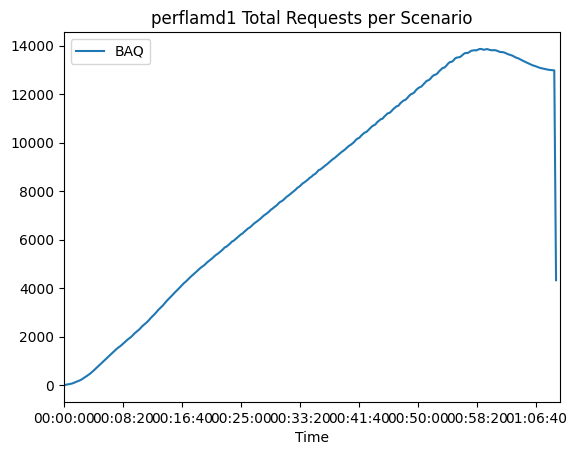

In [59]:
perflamd1_tq_ps.plot(use_index=True, y="BAQ", title="perflamd1 Total Requests per Scenario")

<Axes: title={'center': 'perflamd1 Total Requests per Scenario'}, xlabel='Time'>

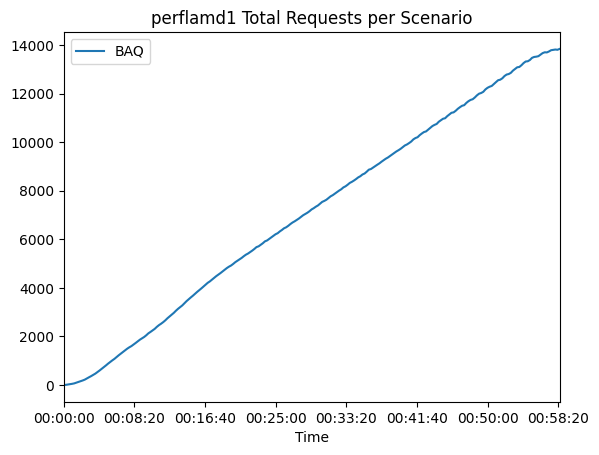

In [60]:
peak_idx = np.argmax(perflamd1_tq_ps["BAQ"].dropna().values)
before_peak = perflamd1_tq_ps.iloc[:peak_idx]
before_peak.plot(use_index=True, y="BAQ", title="perflamd1 Total Requests per Scenario")

In [61]:
cutted = cut_by_window(before_peak, "20m", "40m")

<Axes: title={'center': 'total req'}, xlabel='Time'>

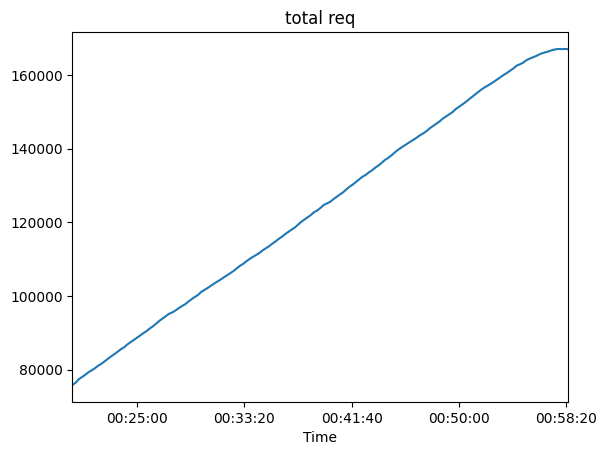

In [63]:
cutted["total"].plot(title="total req")

<Axes: title={'center': 'total req'}, xlabel='Time'>

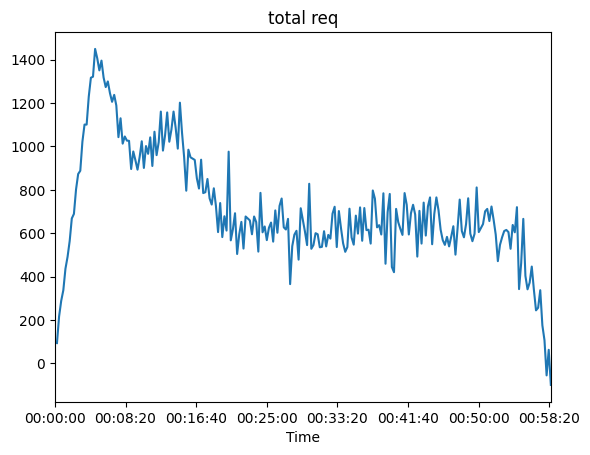

In [64]:
before_peak["total"].diff().plot(title="total req")

In [74]:
result_framed = cutted["total"].diff() / cutted["dT"]

In [84]:
result_framed.describe().to_frame(name="framed")

,framed
count,154.000000
mean,39.435065
std,10.094949
min,-6.666667
25%,36.400000
50%,40.533333
75%,45.650000
max,65.066667


In [76]:
result_before = before_peak["total"].diff() / before_peak["dT"]

Text(0, 0.5, 'req/sec')

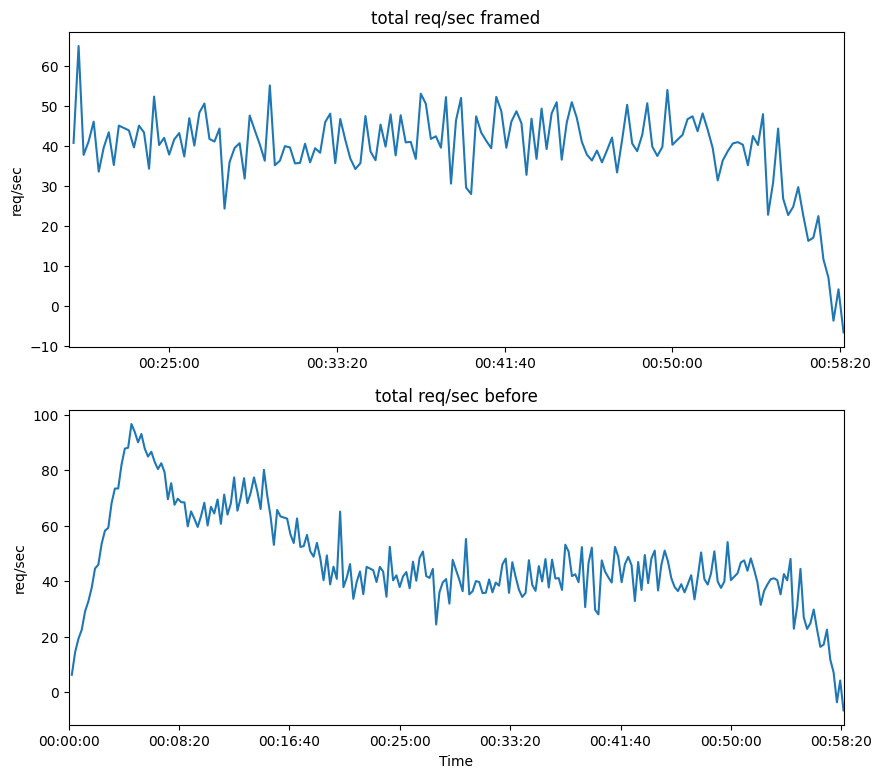

In [81]:
figure, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 9))
ax[0].set_ylabel("req/sec")
result_framed.plot(title="total req/sec framed", ax=ax[0], xlabel="")
result_before.plot(title="total req/sec before")
ax[1].set_ylabel("req/sec")

In [85]:
result_before.describe().to_frame(name="before")

,before
count,234.000000
mean,47.551852
std,17.454714
min,-6.666667
25%,38.416667
50%,44.066667
75%,56.300000
max,96.666667


In [42]:
avg_req_dur = 284.8  # ms
grafana = (1/avg_req_dur) * 1000

In [44]:
def error(x,y):
    return (x-y)/x * 100

error(result_framed.describe()["mean"], grafana)

np.float64(10.9312842216724)